# Importing libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data analysis

In [3]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
df['species'] = df['species'].str.replace('Iris-', "")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA

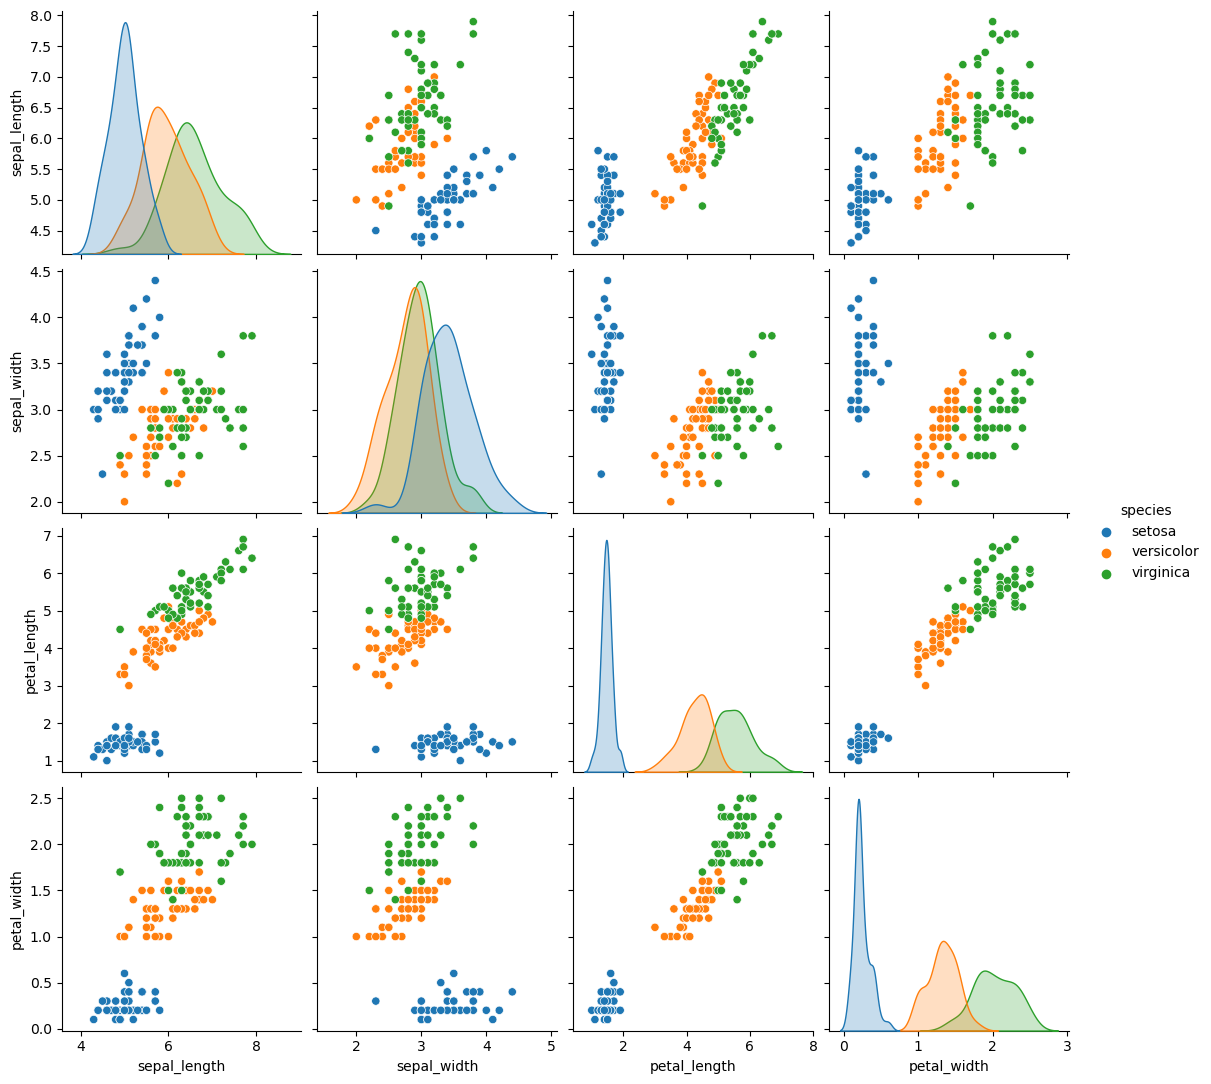

In [7]:
sns.pairplot(df, hue = 'species', height = 2.75 )

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df['species_num'] = df['species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [10]:
# Assuming df is your DataFrame
# First, make sure 'species_num' column contains string values
df['species_num'] = df['species_num'].astype(str)

# Now you can use .str.replace() to replace string values with numeric equivalents
df['species_num'] = df['species_num'].str.replace('setosa', '1')
df['species_num'] = df['species_num'].str.replace('versicolor', '2')
df['species_num'] = df['species_num'].str.replace('virginica', '3')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [12]:
df['species_num'] = pd.to_numeric(df['species_num'],errors = 'coerce', downcast='integer')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


<Axes: >

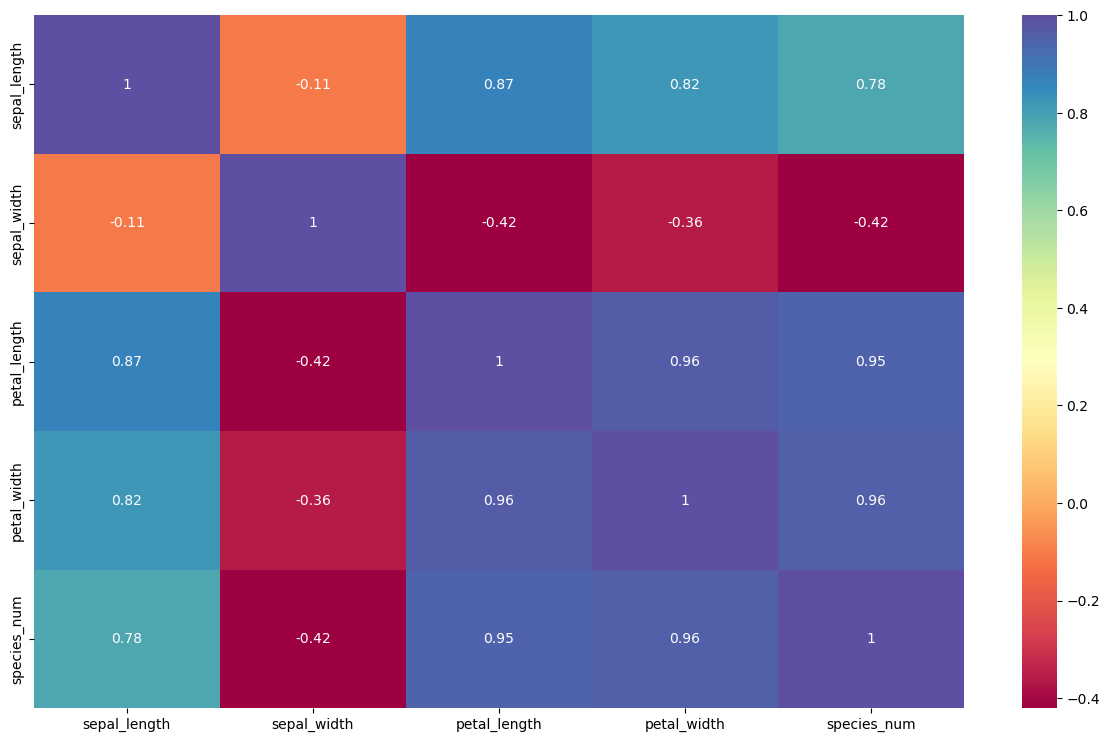

In [14]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), cmap = 'Spectral', annot = True)

In [15]:
df.drop(['petal_length', 'species_num'], axis = 1, inplace = True)
df.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


# Modelling

In [16]:
x = df.drop(['species'], axis = 1)
y = df.species

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [19]:
from sklearn.tree import DecisionTreeClassifier


In [20]:
dt_model = DecisionTreeClassifier()

In [21]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = dt_model.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
print("Accuracy Scaore:", accuracy_score(y_test, y_pred))

Accuracy Scaore: 0.9736842105263158


In [25]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator = dt_model, X = x_train, y = y_train, cv = 10)
cv_scores.mean()

0.8916666666666666

In [26]:
cv_scores

array([0.91666667, 1.        , 1.        , 1.        , 0.63636364,
       0.81818182, 0.90909091, 0.90909091, 0.90909091, 0.81818182])

In [27]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'predicted label')

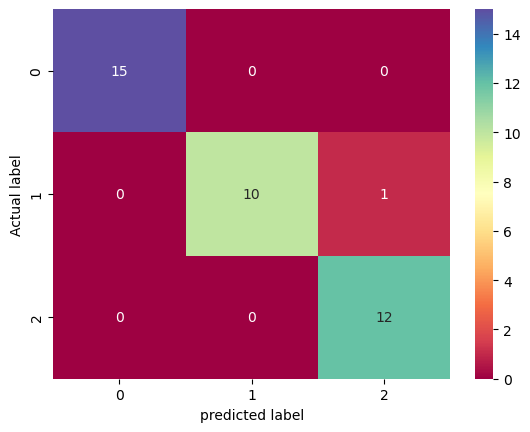

In [28]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = 'Spectral')
plt.ylabel("Actual label")
plt.xlabel("predicted label")

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [30]:
from sklearn import tree

In [31]:
list(df.columns[:-1])

['sepal_length', 'sepal_width', 'petal_width']

In [32]:
features = list(df.columns[:-1])
targets = ['setosa', 'versicolor', 'virginica']
print(targets)
print(features)

['setosa', 'versicolor', 'virginica']
['sepal_length', 'sepal_width', 'petal_width']


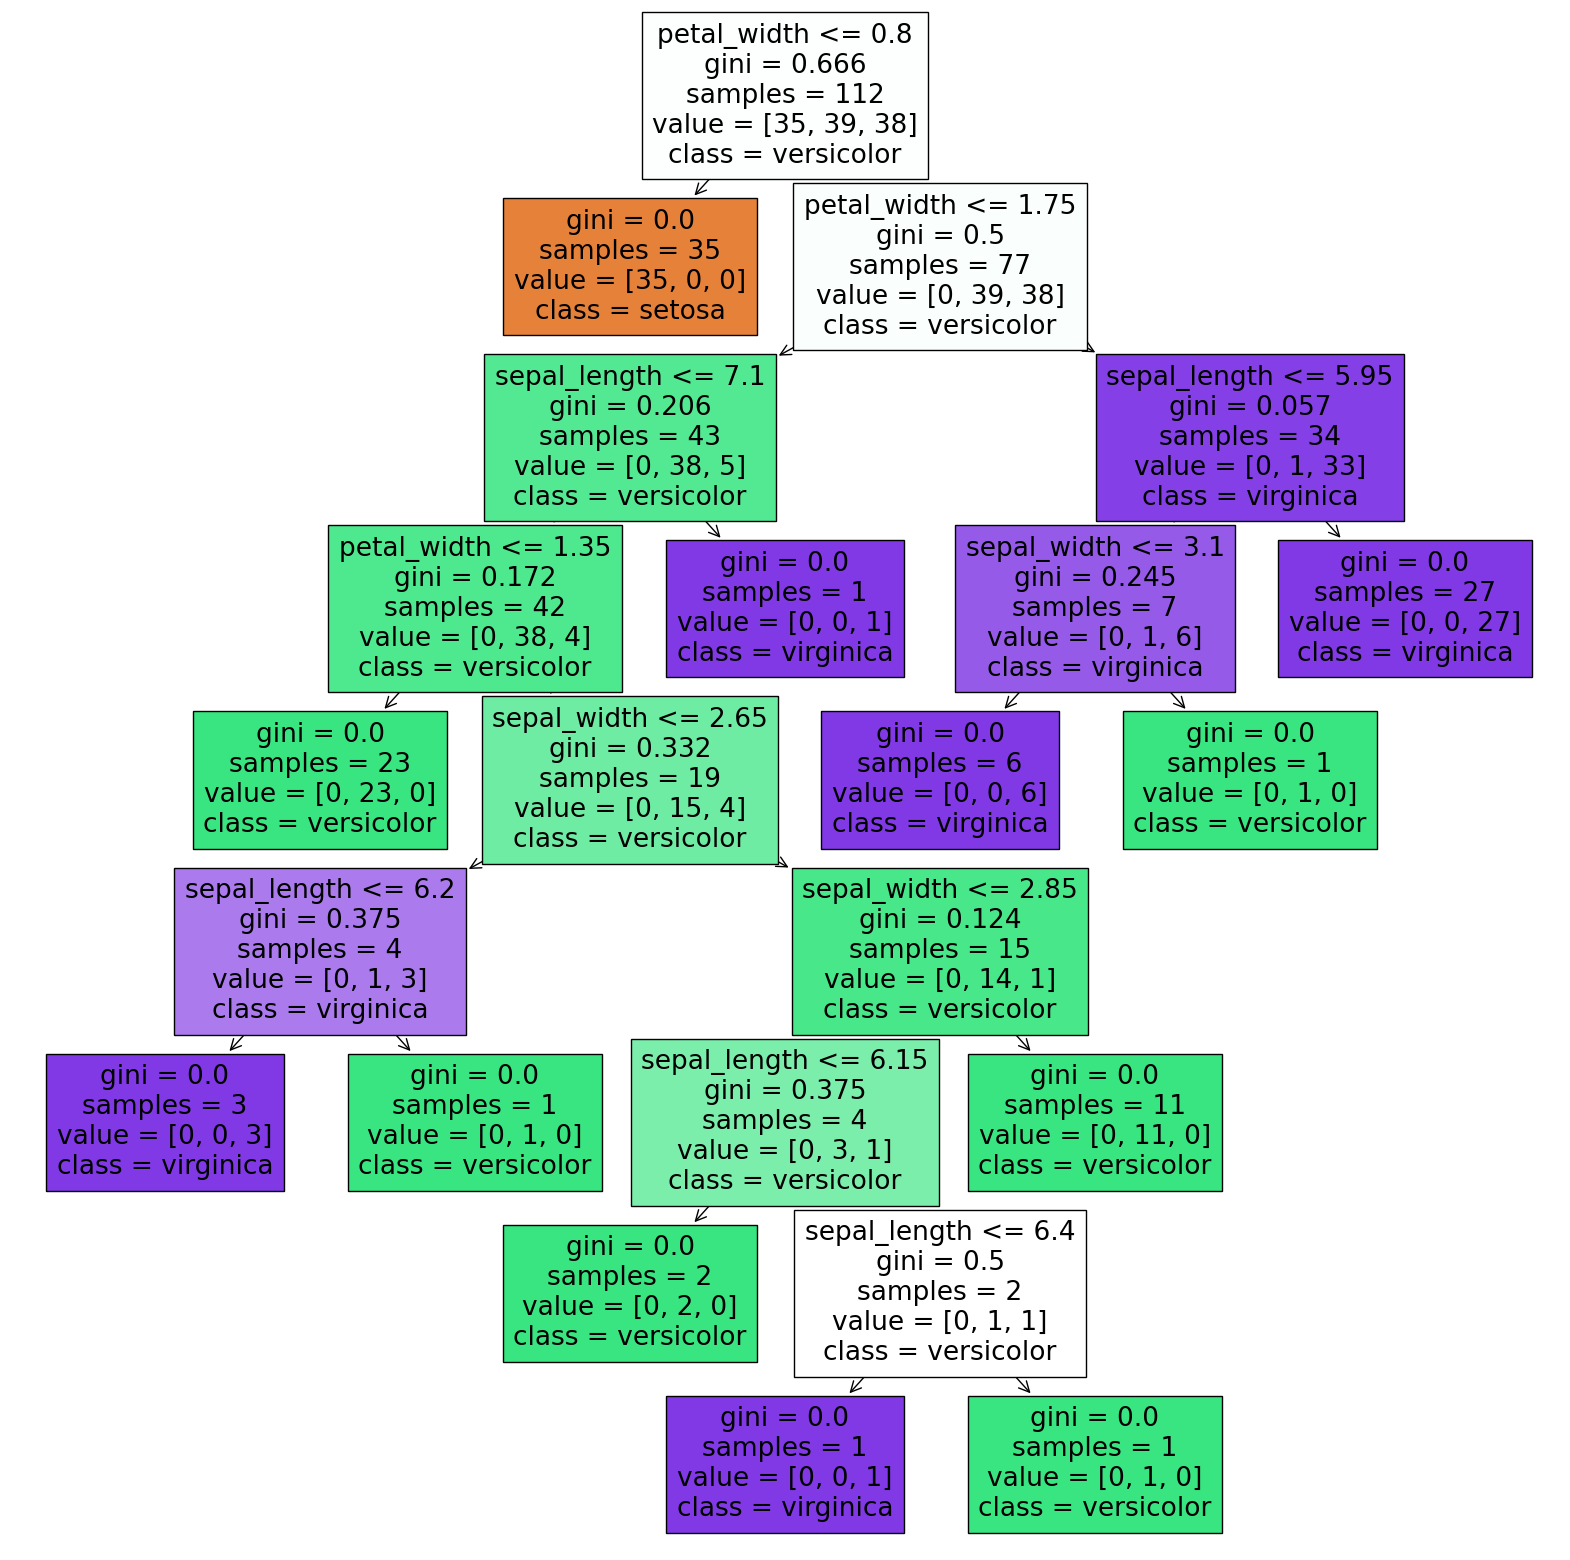

In [33]:
plt.figure(figsize = (20, 20))
tree2 = tree.plot_tree(dt_model, filled = True, feature_names = features, class_names = targets)

# Hyperparameter Optimization

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
dt_model2 = DecisionTreeClassifier()

In [36]:
dt_params = {'criterion' : ['gini', 'entropy'],
            'max_depth' : np.arange(2, 14, 2),
            'max_features': ['auto', 'sqrt', 'log2])']}

In [37]:
dt_cv_model = GridSearchCV(estimator = dt_model2, param_grid = dt_params, cv = 10)

In [38]:
dt_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2])']})

In [39]:
dt_cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [40]:
dt_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features = 'sqrt')

In [41]:
dt_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [42]:
y_pred = dt_tuned.predict(x_test)

In [43]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.9210526315789473


In [44]:
cv_scores = cross_val_score(estimator = dt_model, X = x_train, y = y_train, cv = 10)
cv_scores.mean()

0.8825757575757575

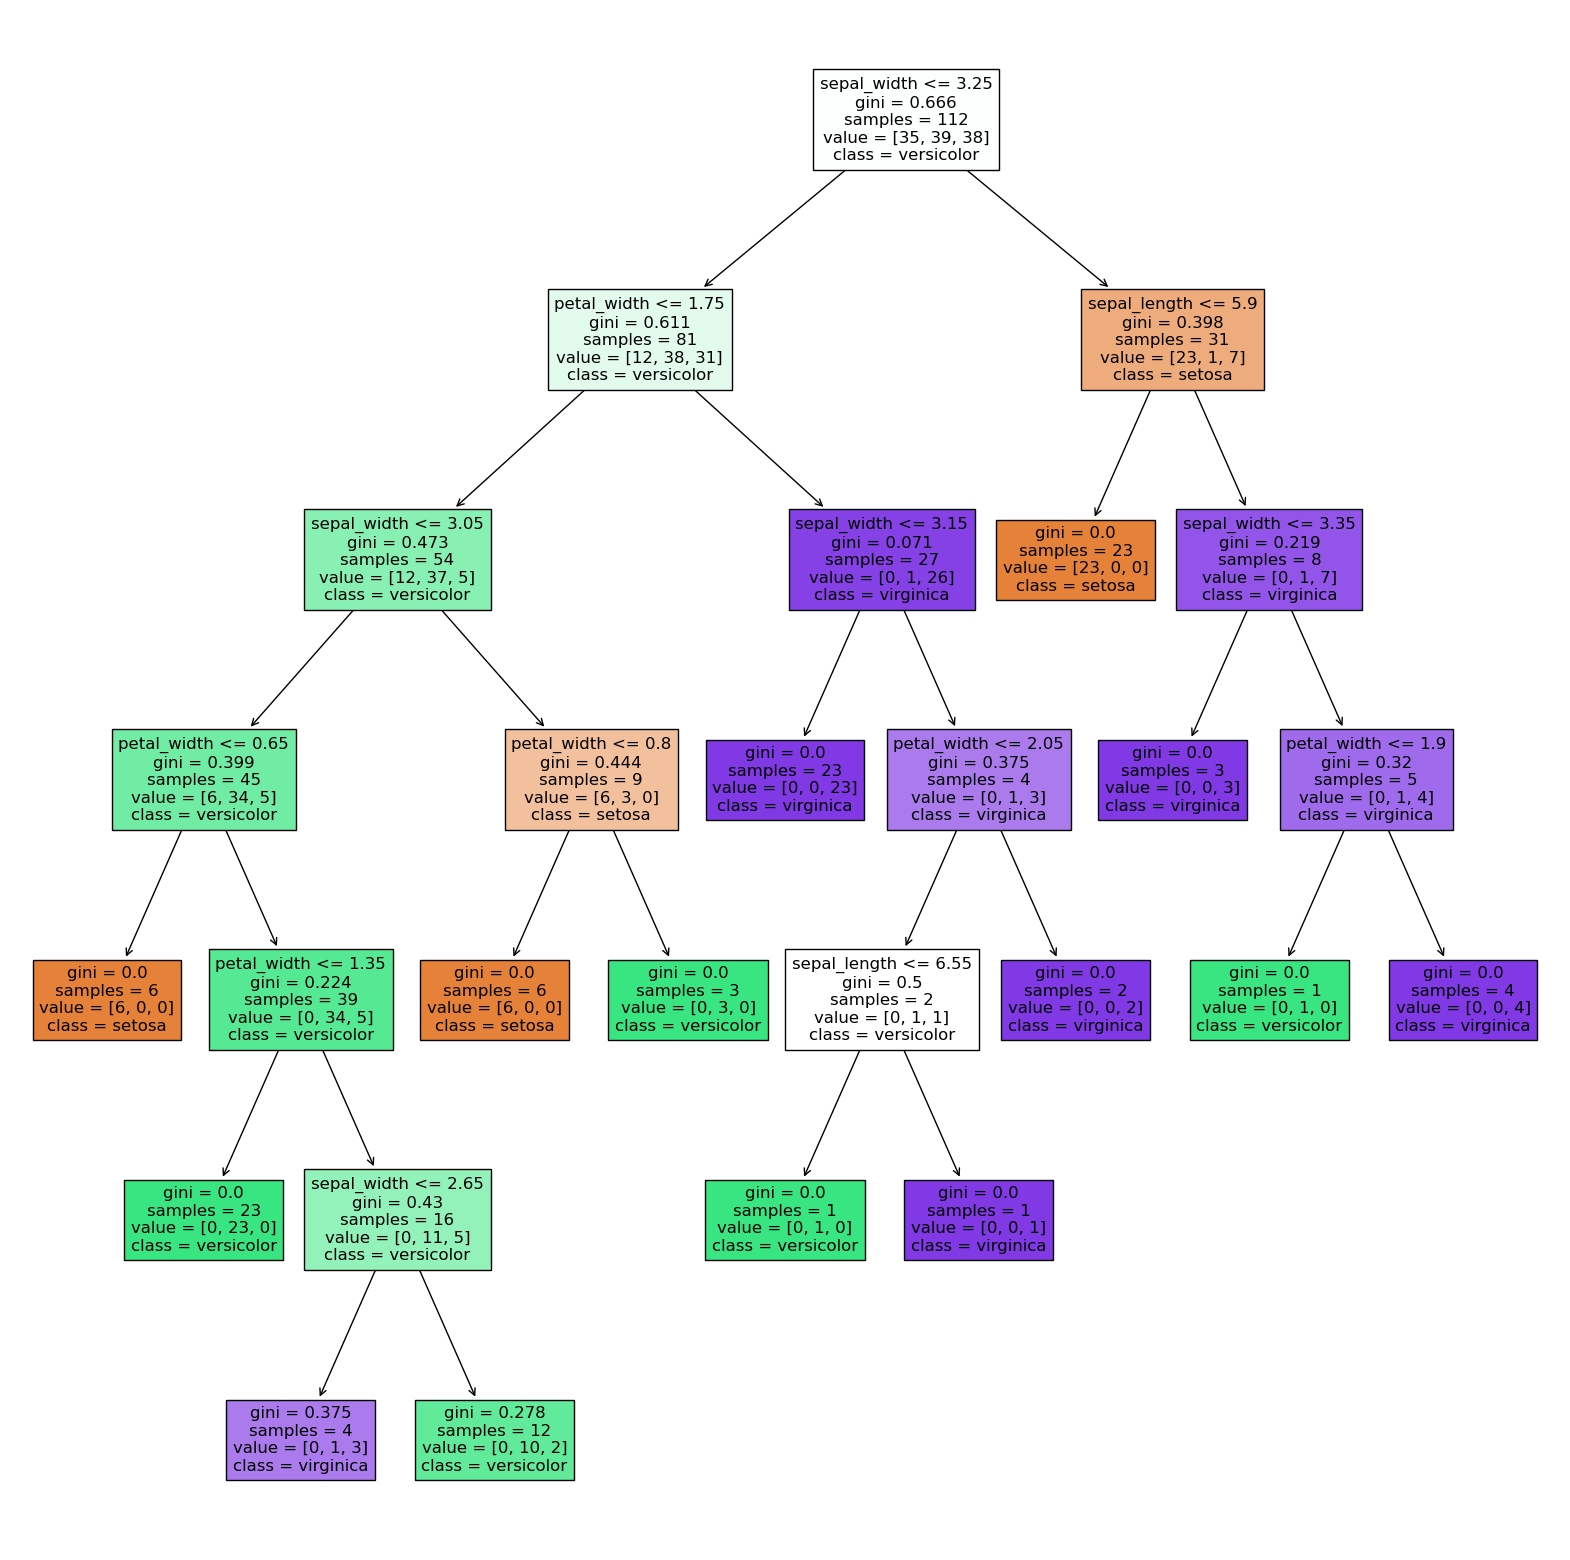

In [45]:
plt.figure(figsize = (20, 20))
tree2 = tree.plot_tree(dt_tuned, filled = True, feature_names = features, class_names = targets)

# Random Forest Modelling

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_model = RandomForestClassifier()

In [48]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = rf_model.predict(x_test)

In [50]:
print("Accuracy Scaore:", accuracy_score(y_test, y_pred))

Accuracy Scaore: 0.9473684210526315


In [51]:
cv_scores = cross_val_score(estimator = dt_model, X = x_train, y = y_train, cv = 10)
cv_scores.mean()

0.8825757575757575

In [52]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0  9  2]
 [ 0  0 12]]


Text(50.722222222222214, 0.5, 'Actual label')

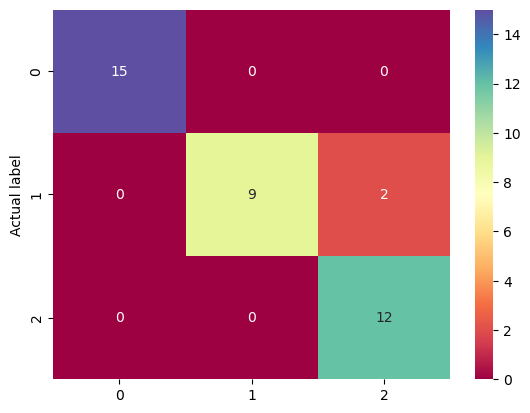

In [53]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = 'Spectral')
plt.ylabel("Actual label")

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.82      0.90        11
   virginica       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [56]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1991343131),
 DecisionTreeClassifier(max_features='sqrt', random_state=887939688),
 DecisionTreeClassifier(max_features='sqrt', random_state=176194737),
 DecisionTreeClassifier(max_features='sqrt', random_state=723720613),
 DecisionTreeClassifier(max_features='sqrt', random_state=295676851),
 DecisionTreeClassifier(max_features='sqrt', random_state=1891838291),
 DecisionTreeClassifier(max_features='sqrt', random_state=1849019559),
 DecisionTreeClassifier(max_features='sqrt', random_state=853442676),
 DecisionTreeClassifier(max_features='sqrt', random_state=619821525),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277779253),
 DecisionTreeClassifier(max_features='sqrt', random_state=859714178),
 DecisionTreeClassifier(max_features='sqrt', random_state=1221459000),
 DecisionTreeClassifier(max_features='sqrt', random_state=443928585),
 DecisionTreeClassifier(max_features='sqrt', random_state=540377214),
 DecisionTreeCl

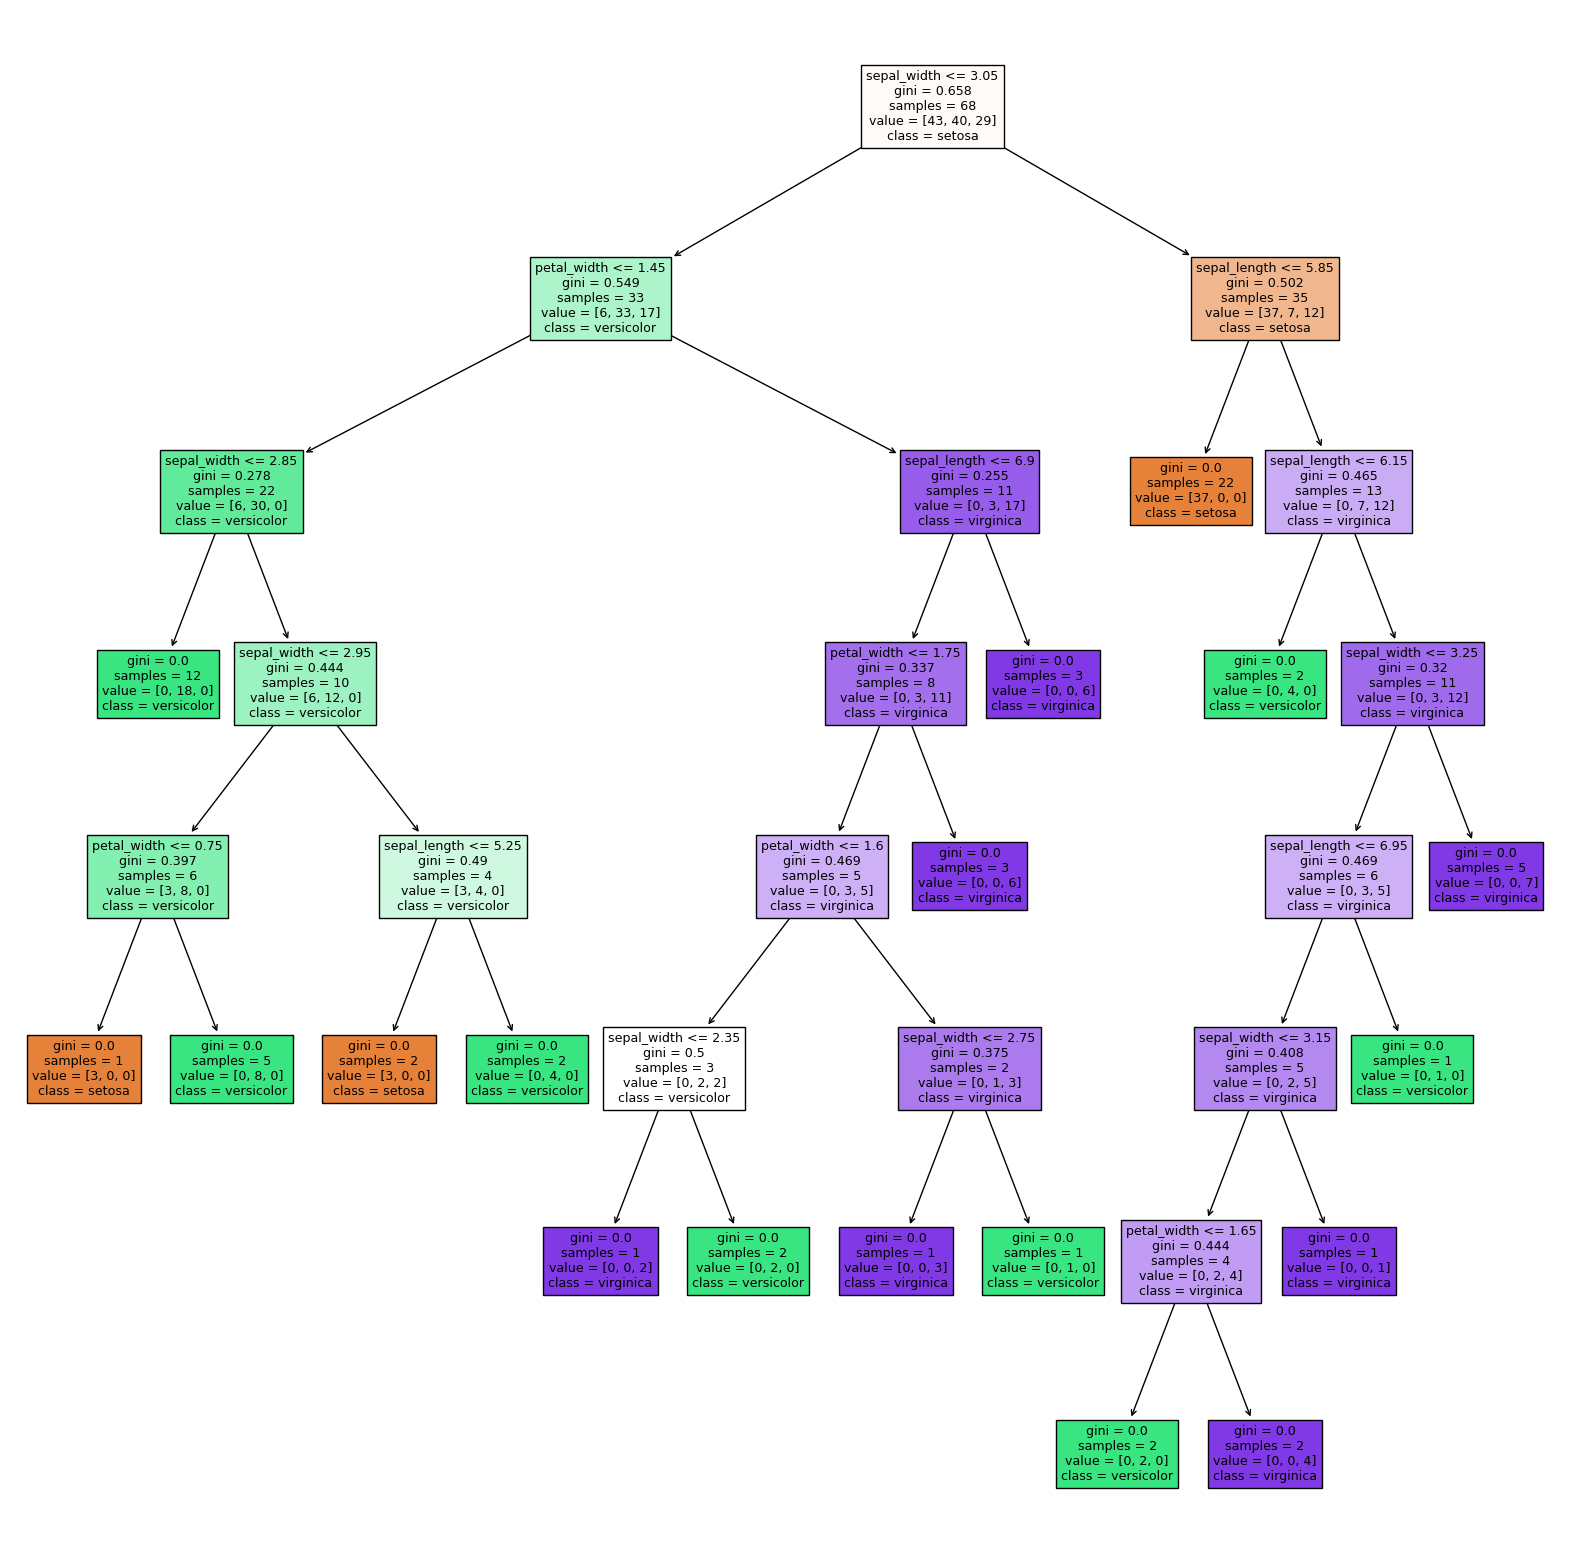

In [57]:
plt.figure(figsize = (20, 20))
tree2 = tree.plot_tree(rf_model.estimators_[0], filled = True, feature_names = features, class_names = targets)

# Hyperparameter optimization

In [58]:
rf_model2 = RandomForestClassifier()

In [62]:
rf_params = {'n_estimators' : [50, 100, 300],
            'max_depth' : np.arange(3, 5, 7),
            'max_features': [2, 4, 6, 8],
            'min_samples_split' : [2, 4, 6]}

In [63]:
rf_cv_model = GridSearchCV(rf_model2, rf_params, cv = 5, n_jobs = -1)

In [64]:
rf_cv_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([3]), 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

In [66]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [68]:
rf_tuned = RandomForestClassifier(max_depth = 3, 
                                 max_features = 2, 
                                 min_samples_split = 2,
                                 n_estimators = 50)

In [69]:
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50)

In [70]:
y_pred = rf_tuned.predict(x_test)

In [71]:
print("Accuracy Scaore:", accuracy_score(y_test, y_pred))

Accuracy Scaore: 1.0


In [72]:
cv_scores = cross_val_score(estimator = dt_model, X = x_train, y = y_train, cv = 10)
cv_scores.mean()

0.8734848484848483

In [73]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


Text(50.722222222222214, 0.5, 'Actual label')

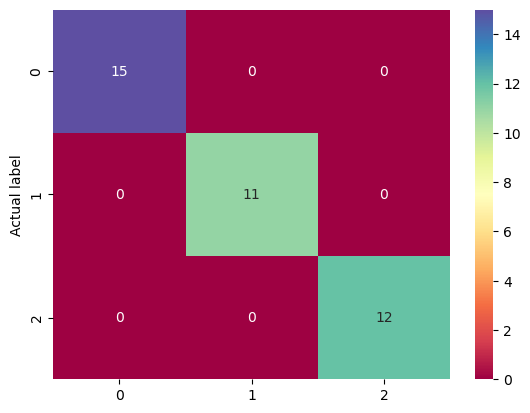

In [74]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = 'Spectral')
plt.ylabel("Actual label")

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [79]:
rf_tuned.feature_importances_

array([0.18774127, 0.03317497, 0.77908376])

In [80]:
x_train.columns

Index(['sepal_length', 'sepal_width', 'petal_width'], dtype='object')

In [81]:
best_features = pd.Series(rf_tuned.feature_importances_,
                         index = x_train.columns).sort_values(ascending = False)

In [82]:
best_features

petal_width     0.779084
sepal_length    0.187741
sepal_width     0.033175
dtype: float64

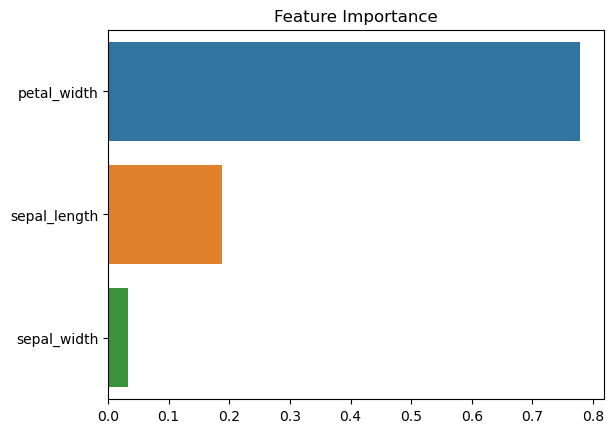

In [84]:
sns.barplot(x = best_features, y = best_features.index)
plt.title('Feature Importance')
plt.show()